In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)

mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist['data'],mnist['target']

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
y[0]

'5'

In [5]:
## change y from string to integers
import numpy as np

y = y.astype(np.uint8)

In [6]:
## create a train with first 60000 and test with last 10000

X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]



In [7]:
## train a binary classifier

y_train_5 = (y_train ==5)
y_test_5 = (y_test ==5)

## next pick a classifier and train it


In [8]:
## stochastic gradient descent 
# fits data based on 28 by 28 linear equation?

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
### test the model on one case

sgd_clf.predict([some_digit])

array([ True])

In [10]:
# measure accuracy using cross validation manually

# kfold cross val without sci kit

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state =42)

### iterate over the three splits

for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [11]:
## 

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [12]:
### fake model that predicts all 5s on purpose

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        return self
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.91125, 0.90855, 0.90915])

In [14]:
## confusion matrix

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [16]:
### copy and paste confusion matrix predictions

y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [20]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred)) ## 3530 / (3530 + 687)

print(recall_score(y_train_5, y_train_pred))  ## 3530 / (3530 + 1891)


0.8370879772350012
0.6511713705958311


In [21]:
### f1 score is esentially   2 / ( 1 / precision +  1 / recall)

from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [25]:
### decision_function assigns a value to the SGD classifier

y_scores = sgd_clf.decision_function([some_digit])
y_scores



array([2164.22030239])

In [24]:
threshold = 0

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [26]:
### you can change the threshold to change the precision recall tradeoff

In [27]:
threshold = 8000

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
## run cross val using decision function

In [28]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [29]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)


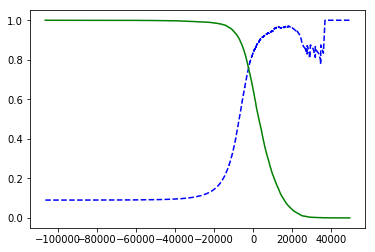

In [30]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

## precision is blue ... recall is green

In [ ]:
### choose threshold where precisoin is 90

In [40]:
threshold_90_precision = thresholds[np.argmax(precisions >= .90)]  #~ 7816

y_train_pred_90 = (y_scores >= threshold_90_precision)

In [41]:
## check predicitions
precision_score(y_train_5, y_train_pred_90)


0.9000345901072293

In [42]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [43]:
from sklearn.metrics import roc_curve
## receiver operating characteristic


### plots true pos rate vs false pos rate


## false pos rate, true pos rate
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

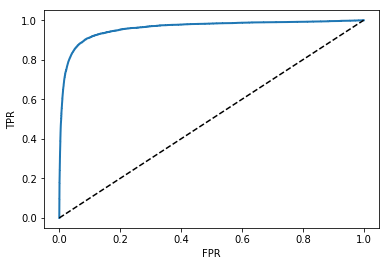

In [49]:
def plot_roc_curve(fpr, tpr, label= None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

### esentially very similar to preccision recall tradeoff

In [ ]:
## use Precision Recall when positive class is rare.. or when you care more about false positives than false negatives

In [50]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [52]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5,cv=3,
                                   method = 'predict_proba')

## predict proba returns an array containing a row per instance and a column per class, 
#each containing the probability that the given instance belongs to the given class

y_scores_forest = y_probas_forest[:,1]  # score = proba of positive class



C:\Users\jdsip\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jdsip\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jdsip\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0.1, 0.9],
       [1. , 0. ],
       [0.9, 0.1],
       ...,
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ]])

In [53]:
y_probas_forest

array([[0.1, 0.9],
       [1. , 0. ],
       [0.9, 0.1],
       ...,
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ]])

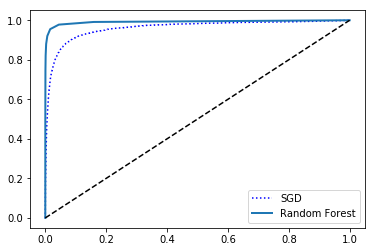

In [54]:
y_scores_forest = y_probas_forest[:,1]  ### probability that it is a 5

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr,tpr,"b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc='lower right')
plt.show()

In [55]:
roc_auc_score(y_train_5, y_scores_forest)

0.9920527492698306

In [ ]:
#### multiclass classification

## SGD , random forest, naive bayes are capable of multiclass

#logistic regression or SVM are binary



In [ ]:
# one vs rest ---> make 10 binary classifiers and use highest probas result
# one vs one ---> make binary classifier for each pair aka (10 choose 2)



In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train) # not y train 5

svm_clf.predict([some_digit])

C:\Users\jdsip\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
## svm automatically used the one vs one approach

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores
### shows the score from each category for some_digit.. the 5 category is highest because it is actually a 5

In [ ]:
np.argmax(some_digit_scores)  ### shows dictionary id for the highest score category

In [ ]:
svm_clf.classes_

In [ ]:
### just for example.. put SVC into one vs rest form

from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)



In [ ]:
ovr_clf.predict([some_digit])


In [ ]:
len(ovr_clf.estimators_)

In [ ]:
## use SGD on full set to predict some digit

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

In [ ]:
### SGD does not require one vs rest or one vs one

In [ ]:
sgd_clf.decision_function([some_digit])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring = 'accuracy')
### use cross val to evaluate SGDs accuracy

In [ ]:
### scaling the inputs can increase the accuracy
# scale the train set

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring = 'accuracy')

In [ ]:
### now finding ways to improve the agreed upon model

#do a cross val predict and then evaluate confusion matrix

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv =3)
conf_mx = confusion_matrix(y_train, y_train_pred)

In [ ]:
conf_mx ### will show a 10 by 10 matrix of all predictions for each column

In [ ]:
### graphic of confusion matrix with gray scale

plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

### shows that many get misclassified as 8s

In [ ]:
### categorize 3s and 5s into 3,3 a  3,5 b  5,3 c  5,5 d

cl_a, cl_b = 3,5

X_aa = X_train[(y_train == cl_a) & (y_train_pred ==cl_a)]

X_ab = X_train[(y_train == cl_a) & (y_train_pred ==cl_b)]

X_ba = X_train[(y_train == cl_b) & (y_train_pred ==cl_a)]

X_bb = X_train[(y_train == cl_b) & (y_train_pred ==cl_b)]


In [ ]:
### plot_digits uses imshow 

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row =5)
plt.subplot(221); plot_digits(X_ab[:25], images_per_row =5)
plt.subplot(221); plot_digits(X_ba[:25], images_per_row =5)
plt.subplot(221); plot_digits(X_bb[:25], images_per_row =5)
plt.show()

In [ ]:
### multilabel classification



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## create a KNN classifier for two different conditions, >= 7 and odd

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:

knn_clf.predict([some_digit])

### shows array based on the digit 5   [false, true] 

In [ ]:
## train predictions for the knn different conditions

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)


In [ ]:
## evaluate knn preds on the original multilabel 2 column array with f1 score

f1_score(y_multilabel, y_train_knn_pred)

In [ ]:
### multioutput classification